<a href="https://colab.research.google.com/github/Raul-Campero/Raul-Campero/blob/main/Implementaci%C3%B3n_de_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

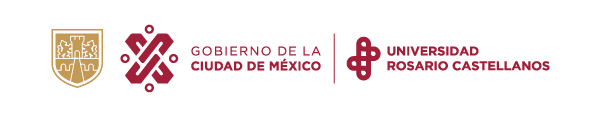

### Padron Movimiento Cuidadano


####Bliblioteca de código


In [ ]:
!wget https://www.ine.mx/wp-content/uploads/2023/09/PADRON_MC_2023.xlsx
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px

####Leer el archivo Excel

In [88]:
df = pd.read_excel("/PADRON_MC_2023.xlsx")

####Seleccionar el rango de datos de interés

In [104]:
_df = df.loc[9:383903]

####Cambiar el nombre de las columnas

In [99]:
_df = _df.rename(columns={'Unnamed: 0': 'Estado', 'DIRECCIÓN EJECUTIVA DE PRERROGATIVAS Y PARTIDOS POLÍTICOS': 'A_Paterno', 'Unnamed: 2': 'A_Materno', 'Unnamed: 3': 'Nombre', 'Unnamed: 4': 'Fecha'})

####Obtener la columna de fechas de afiliación

In [103]:
fechas = _df['Fecha'].tolist()

####Filtrar solo las fechas válidas y obtener los años

In [115]:
anos = [fecha.year if not pd.isnull(fecha) else None for fecha in fechas]

#La función pd.isnull en pandas se usa para verificar si algún valor en el DataFrame especificado es NaN.
#NaN significa No es un número y es un valor flotante especial en Python. Representa datos faltantes o nulos en el conjunto de datos.

####Eliminar valores nulos de la lista de años

In [116]:
anos = [ano for ano in anos if ano is not None]

####Convertir años a lustros

In [122]:
lustros = [(ano // 5) * 5 for ano in anos]

####Contar la frecuencia de cada lustro

In [123]:
info = dict()
for lustro in lustros:
    if lustro in info:
        info[lustro] += 1
    else:
        info[lustro] = 1

####Ordenar la información por lustro

In [124]:
info_bueno = sorted(info.items())

####Crear un DataFrame con la información

In [125]:
data = {
    "lustros": [item[0] for item in info_bueno],
    "afiliados": [item[1] for item in info_bueno]
}
df = pd.DataFrame(data=data)
df = df.sort_values(by=['lustros'])

####Visualizar la evolución de afiliados por lustro

In [126]:
fig = px.line(df, x="lustros", y="afiliados", title='Evolución de Afiliados por Lustro')
fig.show()

###Regresión lineal

In [ ]:
X = np.array(df['lustros']).reshape(-1, 1)
y = np.array(df['afiliados'])

modelo = LinearRegression()
modelo.fit(X, y)

###Hacer predicciones para el periodo 2021-2023

In [128]:
predicciones = modelo.predict(np.array([2021, 2022, 2023]).reshape(-1, 1))
print(predicciones)

[143811.70285714 149724.97714286 155638.25142857]


###Visualizar los resultados

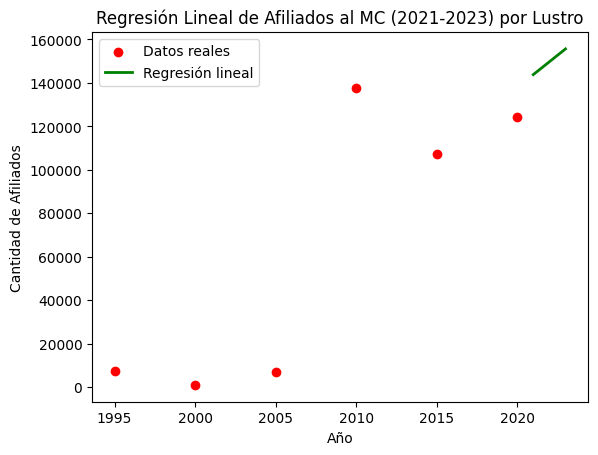

In [131]:
plt.scatter(X, y, color='red', label='Datos reales')
plt.plot([2021, 2022, 2023], predicciones, color='green', linewidth=2, label='Regresión lineal')
#plt.plot(predicciones_anos, predicciones_lustros, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal de Afiliados al MC (2021-2023) por Lustro')
plt.xlabel('Año')
plt.ylabel('Cantidad de Afiliados')
plt.legend()
plt.show()